In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['STIX']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['STIX']})
rc('text', usetex=True)

In [2]:
numstate=299 # Keep numstate odd for symmetrical distribution of states about the y axis
nr=100
ntheta=100
eig=2.0
k=3 #Bargmann index

In [3]:
#In phase superposition
tau0=np.arcsinh(-eig/k)
y0=np.tanh(0.5*tau0)

In [4]:
zeta0=1j*y0
chi=np.linspace(-10,10,numstate)
state=np.zeros((int(numstate),2),dtype=np.complex128) # second element contains the phase
state[:,0]=(zeta0-np.tanh(chi/2))/(1-zeta0*np.tanh(chi/2))
state[:,1]=eig*chi+2*k*np.angle(1-np.conj(zeta0)*np.tanh(chi/2))

In [5]:
# define dot product of two states
def dotprod(state1,state2):
    zeta1=state1[0];zeta2=state2[0];
    phi1=state1[1].real;phi2=state2[1].real;
    dot=np.power(1-np.abs(zeta1)**2,k)*np.power(1-np.abs(zeta2)**2,k)/np.power(1-np.conj(zeta1)*zeta2,2*k)
    return dot*np.exp(1j*(phi2-phi1))

In [6]:
#Normalize the superposition
N=0
for i in range(numstate):
    for j in range(numstate):
        N=N+dotprod(state[i],state[j]) 
#Actually norm is the norm squared
N=N.real

In [7]:
#Define the Q function
def qfunc(r,theta,numstate):
    zeta=r*np.exp(1j*theta)
    statezeta=np.array([zeta,0])
    temp=0
    for j in range(numstate):
        temp=temp+dotprod(statezeta,state[j])
    temp=np.square(np.abs(temp))/N
    return temp

vqfunc=np.vectorize(qfunc)

In [8]:
#Q function
r=np.linspace(0,1,nr)
theta=np.linspace(0,2*np.pi,ntheta)
R, Theta = np.meshgrid(r, theta)
val=vqfunc(R,Theta,numstate)

<Figure size 1080x1080 with 0 Axes>

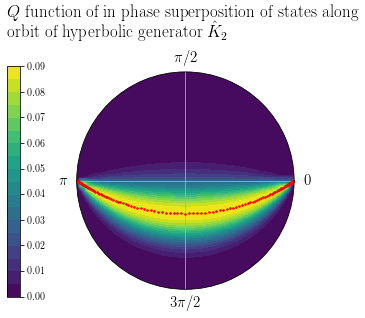

In [9]:
plt.figure(figsize=(15, 15))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
#plt.title('Q-K2' '\n')
axcf=ax.contourf(Theta, R, val,cmap='viridis',levels=20)

cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8])  # This is the position for the colorbar
cb = plt.colorbar(axcf, cax = cbaxes,pad=0.1)
ax.tick_params(labelsize=15)

#cb = fig.colorbar(cax,pad=0.1)
#cb.set_label("$Q$ function")
#plt.axis('off')
plt.title('$Q$ function of in phase superposition of states along \n orbit of hyperbolic generator $\hat{K}_2$',pad=25,fontsize=17,loc='left')
ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2])
ax.set_xticklabels(['0',r'${\pi}/{2}$',r'$\pi$',r'${3\pi}/{2}$'])
ax.set_yticks([])


#Plot the orbit along which states are placed
zeta=state[:,0]
rorb=np.abs(zeta);thetaorb=np.angle(zeta)
ax.plot(thetaorb,rorb,'ro',markersize=1.5)

fig.savefig('QK2.pdf',bbox_inches='tight')

In [10]:
# theta,rad = np.meshgrid(used_theta, used_rad) #rectangular plot of polar data
# X = theta
# Y = rad

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='polar')
# ax.pcolormesh(Theta, R, val,cmap='viridis') #X,Y & data2D must all be same dimensions
# cb = fig.colorbar(cax,pad=0.1)
# ax.set_yticks([])
# ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2])
# ax.set_xticklabels([0,r'$\pi/2$',r'$\pi$',r'$3\pi/2$'])
# #Plot the orbit along which states are placed
# zeta=state[:,0]
# rorb=np.abs(zeta);thetaorb=np.angle(zeta)
# ax.plot(thetaorb,rorb,'kx',markersize=1.5)
# plt.show()

# fig.savefig('QK2.pdf',bbox_inches='tight')

In [10]:
yvals=np.linspace(-0.6,0.6,3000)
zetavals=1j*yvals
check=vqfunc(zetavals,0,numstate)

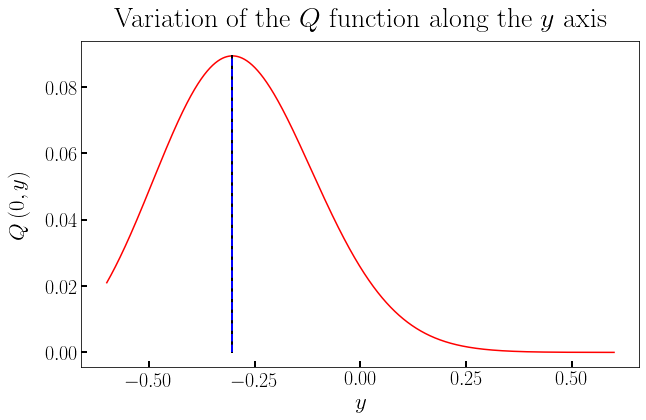

In [11]:
fig, axes = plt.subplots(figsize=(10,6))
axes.plot(yvals, check, 'r')
axes.set_xlabel(r'$y$',fontsize=23)
axes.set_ylabel(r'$Q\,(0,y)$',fontsize=23,labelpad=15)
axes.tick_params(direction='in', length=6, width=2, colors='k',labelsize=20)
axes.set_xticks([-0.5,-0.25,0,0.25,0.5])
#axes.set_yticks([0.01,0.03,0.05,0.07])
axes.set_title(r'Variation of the $Q$ function along the $y$ axis',fontsize=28,pad=15);
axes.plot([y0, y0], [0, check.max()], color='k', linestyle='-', linewidth=2)
#plot([a, a], [0, check.max()], color='k', linestyle='-', linewidth=2)
yvalmax=yvals[np.argmax(check)]
#plot([-qvalmax, -qvalmax], [0, check.max()], color='b', linestyle='--', linewidth=2)
axes.plot([yvalmax, yvalmax], [0, check.max()], color='b', linestyle='--', linewidth=2)
fig.savefig('HyperbolicQvalalongy.pdf',bbox_inches='tight')